In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(123)
import seaborn as sns

In [4]:
df_2019 = pd.read_excel('data/airbnb_April_Sep2019.xlsx')
df_2020 = pd.read_excel('data/airbnb_April_Sep2020.xlsx')

In [5]:
# drop unnessary columns
#last_review was dropped, because all the data are from 2019.4-2019.10,and we already extract the month from the date. 
df_2019 = df_2019.drop(['name','host_id','host_name','latitude','longitude','last_review'], axis=1)
df_2020 = df_2020.drop(['name','host_id','host_name','latitude','longitude','last_review'], axis=1)

In [6]:
df_2019.set_index('id', inplace=True)
df_2020.set_index('id', inplace=True)

In [7]:
print(max(df_2019['price']))
print(max(df_2020['price']))

7500
4500


In [9]:
df_2019['price'].quantile(0.95)

350.0

In [10]:
df_2020['price'].quantile(0.95)

300.5499999999993

### There are some outliers for the price and minimum_nights
#### Remove:
* Price >= 350 for 2019
* Price >= 300 for 2020

* minimum_nights >= 365


In [11]:
df_19 = df_2019[(df_2019['price']<=350) & (df_2019['minimum_nights']<=365)]
df_20 = df_2020[(df_2020['price']<=300) & (df_2020['minimum_nights']<=365)]

In [12]:
#rename the review_month column values
df_19['review_month'] = df_19['review_month'].replace([4,5,6,7,8,9],['review_April','review_May','review_June','review_July','review_Aug','review_Sept'])
df_20['review_month'] = df_20['review_month'].replace([4,5,6,7,8,9],['review_April','review_May','review_June','review_July','review_Aug','review_Sept'])

C:\Users\yueli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yueli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_19.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16617.000000,16617.000000,16617.000000,16617.000000,16617.000000,16617.000000
mean,122.193657,6.580550,35.409400,1.534675,8.258831,146.311187
std,71.744050,13.021367,51.156322,1.422935,40.335612,134.088595
min,10.000000,1.000000,1.000000,0.020000,1.000000,0.000000
25%,65.000000,2.000000,5.000000,0.470000,1.000000,11.000000
50%,100.000000,2.000000,14.000000,1.030000,1.000000,109.000000
75%,160.000000,5.000000,44.000000,2.190000,3.000000,293.000000
max,350.000000,365.000000,498.000000,14.850000,371.000000,365.000000


In [14]:
df_20.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000,7400.000000
mean,105.271622,8.553514,49.724730,1.688445,7.254865,166.781081
std,60.818117,15.358151,67.564337,1.593890,21.544415,139.718047
min,10.000000,1.000000,1.000000,0.030000,1.000000,0.000000
25%,56.000000,1.000000,5.000000,0.560000,1.000000,19.000000
50%,91.000000,3.000000,21.000000,1.205000,2.000000,153.000000
75%,140.000000,7.000000,68.000000,2.412500,4.000000,325.000000
max,300.000000,365.000000,629.000000,35.450000,239.000000,365.000000


### One-hot encoding
#### Convert all categorical variables into dummy variables

#### 1. Try convert all the neighbourhood into dummy variables (not just neighbourhood group) 
* There will be more than 200 neighbourhood area. We generate a dataset only contains large neighbourhood groups to make correlation matrix

In [16]:
cleaned_df19 = pd.get_dummies(df_19)
cleaned_df20 = pd.get_dummies(df_20)

In [17]:
#There will be 229 columns in total
cleaned_df19
cleaned_df20

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_month_review_April,review_month_review_Aug,review_month_review_July,review_month_review_June,review_month_review_May,review_month_review_Sept
id,,,,,,,,,,,,,,,,,,,,,
3831,76,1,354,4.82,1,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5803,82,4,181,1.30,3,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7097,191,2,233,1.78,2,331,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8490,120,2,116,0.86,2,352,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9657,175,3,34,0.25,1,90,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528663,52,1,1,1.00,4,85,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
45528803,55,1,1,1.00,4,85,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
45538046,68,1,2,2.00,1,352,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### 2. Try to delete neighbourhood columns and only convert neighbourhood groups into dummy variables

In [18]:
df19_Lneighbour = df_19.drop(['neighbourhood'],axis = 1) 
df20_Lneighbour = df_20.drop(['neighbourhood'],axis = 1) 

In [19]:
cleaned_df19_Lneighbour = pd.get_dummies(df19_Lneighbour)
cleaned_df20_Lneighbour = pd.get_dummies(df20_Lneighbour)

In [20]:
#There will be 21 columns in total
cleaned_df19_Lneighbour
cleaned_df20_Lneighbour

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_month_review_April,review_month_review_Aug,review_month_review_July,review_month_review_June,review_month_review_May,review_month_review_Sept
id,,,,,,,,,,,,,,,,,,,,,
3831,76,1,354,4.82,1,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5803,82,4,181,1.30,3,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7097,191,2,233,1.78,2,331,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8490,120,2,116,0.86,2,352,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9657,175,3,34,0.25,1,90,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528663,52,1,1,1.00,4,85,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
45528803,55,1,1,1.00,4,85,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
45538046,68,1,2,2.00,1,352,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


### Correlation Matrix

In [28]:
corr19_1 = cleaned_df19.corr()
corr19_1

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_month_review_April,review_month_review_Aug,review_month_review_July,review_month_review_June,review_month_review_May,review_month_review_Sept
price,1.000000,-0.014429,-0.038546,-0.060753,0.171109,0.016993,-0.111507,-0.151276,0.330902,-0.185281,...,0.632940,0.032880,-0.591818,-0.156536,-0.001965,-0.000824,0.011493,-0.010578,-0.000200,0.000353
minimum_nights,-0.014429,1.000000,-0.134214,-0.226382,0.076141,0.137263,-0.031507,-0.052524,0.090248,-0.033563,...,0.087972,-0.032562,-0.075230,-0.019091,0.037838,0.137648,0.067935,0.049285,0.047382,-0.199587
number_of_reviews,-0.038546,-0.134214,1.000000,0.558509,-0.083254,0.135044,-0.005079,0.016009,-0.016162,0.002248,...,-0.017233,-0.031690,0.031891,-0.024588,-0.076571,-0.130212,-0.101202,-0.088796,-0.089529,0.266711
reviews_per_month,-0.060753,-0.226382,0.558509,1.000000,-0.051201,0.063471,0.019790,-0.038272,-0.026340,0.079595,...,-0.083156,0.030272,0.068901,0.025285,-0.129970,-0.186268,-0.157674,-0.147225,-0.150391,0.416963
calculated_host_listings_count,0.171109,0.076141,-0.083254,-0.051201,1.000000,0.186982,-0.024113,-0.118526,0.151269,-0.029323,...,0.096256,0.017328,-0.096504,-0.011677,-0.004472,0.042043,0.014115,0.034708,0.005701,-0.056942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
review_month_review_Aug,-0.000824,0.137648,-0.130212,-0.186268,0.042043,-0.030457,-0.013157,0.005961,0.018333,-0.028461,...,0.026852,0.000233,-0.026496,-0.001539,-0.078601,1.000000,-0.121499,-0.107706,-0.101140,-0.534108
review_month_review_July,0.011493,0.067935,-0.101202,-0.157674,0.014115,-0.064917,-0.004812,0.007018,-0.005075,-0.002196,...,0.023056,0.004857,-0.017852,-0.019694,-0.054907,-0.121499,1.000000,-0.075238,-0.070651,-0.373099
review_month_review_June,-0.010578,0.049285,-0.088796,-0.147225,0.034708,-0.044521,0.004555,-0.000502,0.003716,-0.003294,...,-0.008623,-0.001774,0.008129,0.002804,-0.048673,-0.107706,-0.075238,1.000000,-0.062631,-0.330744
review_month_review_May,-0.000200,0.047382,-0.089529,-0.150391,0.005701,-0.066017,-0.000680,0.006980,0.009511,-0.021110,...,0.000511,-0.013521,0.007187,-0.015077,-0.045706,-0.101140,-0.070651,-0.062631,1.000000,-0.310580


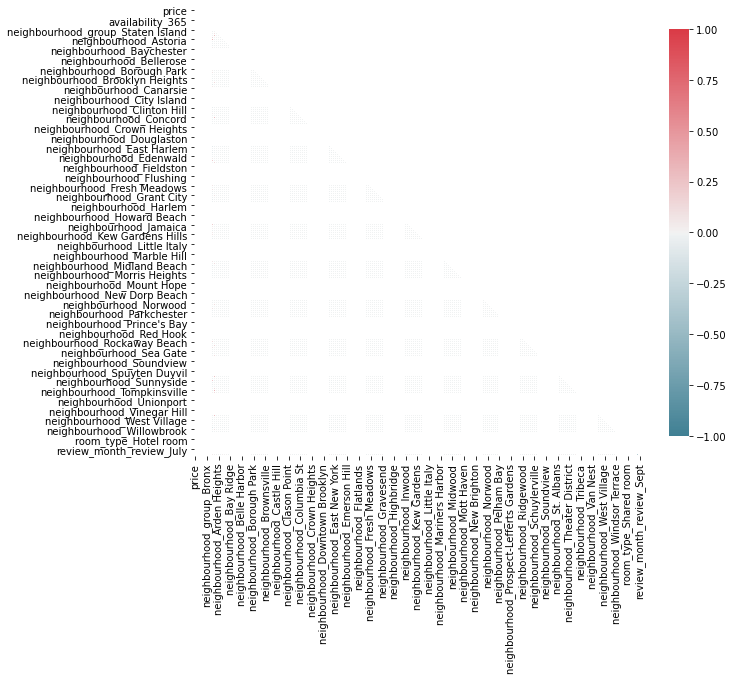

In [27]:
f, ax = plt.subplots(figsize=(10, 10))

mask = np.zeros_like(corr19_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr19_1,          # The data to plot
    mask=mask,     # Mask upper-right cells
    cmap=cmap,    
    annot=False,    # don't plot values in the cells
    vmax=1,      
    vmin=-1,     
    center=0,      
    square=True,   # make square cells 
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .75}  # Extra kwargs for the legend; in this case, shrink to 75%
)


f.savefig('correlation matrix_heatmap.png')

* 1. correlation matrix for cleaned_df19 dataset which includes all the neighbourhood areas \
In this case, the plot is terrible. It doesn't seem to have any correlation between different neighourhoods. I will only use another dataset to plot the correlation. 

In [29]:
corr19_2 = cleaned_df19_Lneighbour.corr()

* 2. correlation matrix for cleaned_df19_Lneighbour dataset which includes only 5 large neighbourhood groups

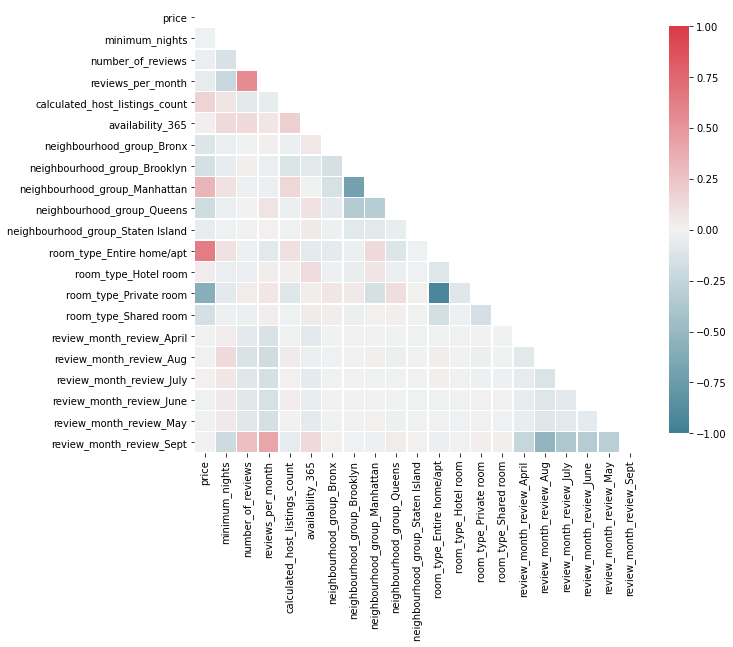

In [30]:
f, ax = plt.subplots(figsize=(10, 10))

mask = np.zeros_like(corr19_2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr19_2,          # The data to plot
    mask=mask,     # Mask upper-right cells
    cmap=cmap,    
    annot=False,    # don't plot values in the cells
    vmax=1,      
    vmin=-1,     
    center=0,      
    square=True,   # make square cells 
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .75}  # Extra kwargs for the legend; in this case, shrink to 75%
)


f.savefig('correlation matrix_heatmap.png')

* The number_of_reviews and reviews_per_month are highly correlated. So reviews_per_month will be deleted from the datasets.\
It will be done for both dataset.

In [31]:
cleaned_df19_Lneighbour = cleaned_df19_Lneighbour.drop(['reviews_per_month'],axis=1)
cleaned_df19 = cleaned_df19.drop(['reviews_per_month'],axis=1)

In [32]:
cleaned_df19 = cleaned_df19[cleaned_df19['price']<=350]

In [33]:
cleaned_df20_Lneighbour = cleaned_df20_Lneighbour.drop(['reviews_per_month'],axis=1)
cleaned_df20 = cleaned_df20.drop(['reviews_per_month'],axis=1)

In [34]:
cleaned_df20 = cleaned_df20[cleaned_df20['price']<=300]

In [35]:
cleaned_df20.shape

(7400, 225)

In [36]:
cleaned_df19.shape

(16617, 228)

### Build training and testing datasets

* 1. For the cleaned_df19, cleaned_df20 with specific neighbourhood area (200+ columns)

In [33]:
X19 = cleaned_df19.drop('price', axis=1)
y19 = cleaned_df19.price
# Scaling
#scaler = StandardScaler()
#X19 = pd.DataFrame(scaler.fit_transform(X19), columns=list(X19.columns))
# Randomly split into trainning and testing datasets 8:2
X_train19, X_test19, y_train19, y_test19 = train_test_split(X19, y19, test_size=0.2, random_state=123)

In [34]:
X20 = cleaned_df20.drop('price', axis=1)
y20 = cleaned_df20.price
# Scaling
#scaler = StandardScaler()
#X20 = pd.DataFrame(scaler.fit_transform(X20), columns=list(X20.columns))
# Randomly split into trainning and testing datasets 8:2
X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, test_size=0.2, random_state=123)

In [208]:
X_train19.to_excel('data/X_train19.xlsx')
y_train19.to_excel('data/y_train19.xlsx')
X_test19.to_excel('data/X_test19.xlsx')
y_test19.to_excel('data/y_test19.xlsx')

In [209]:
X_train20.to_excel('data/X_train20.xlsx')
y_train20.to_excel('data/y_train20.xlsx')
X_test20.to_excel('data/X_test20.xlsx')
y_test20.to_excel('data/y_test20.xlsx')